<a href="https://colab.research.google.com/github/ranabag/Youtube-analsis-dashboard/blob/main/Youtube_analysis_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎬 Generating YouTube Dataset...
✅ Generated 1500 videos from 9 channels
📊 Average views: 200,366
📝 Average title length: 34.3 chars
🔤 Videos with CAPS: 75.7%


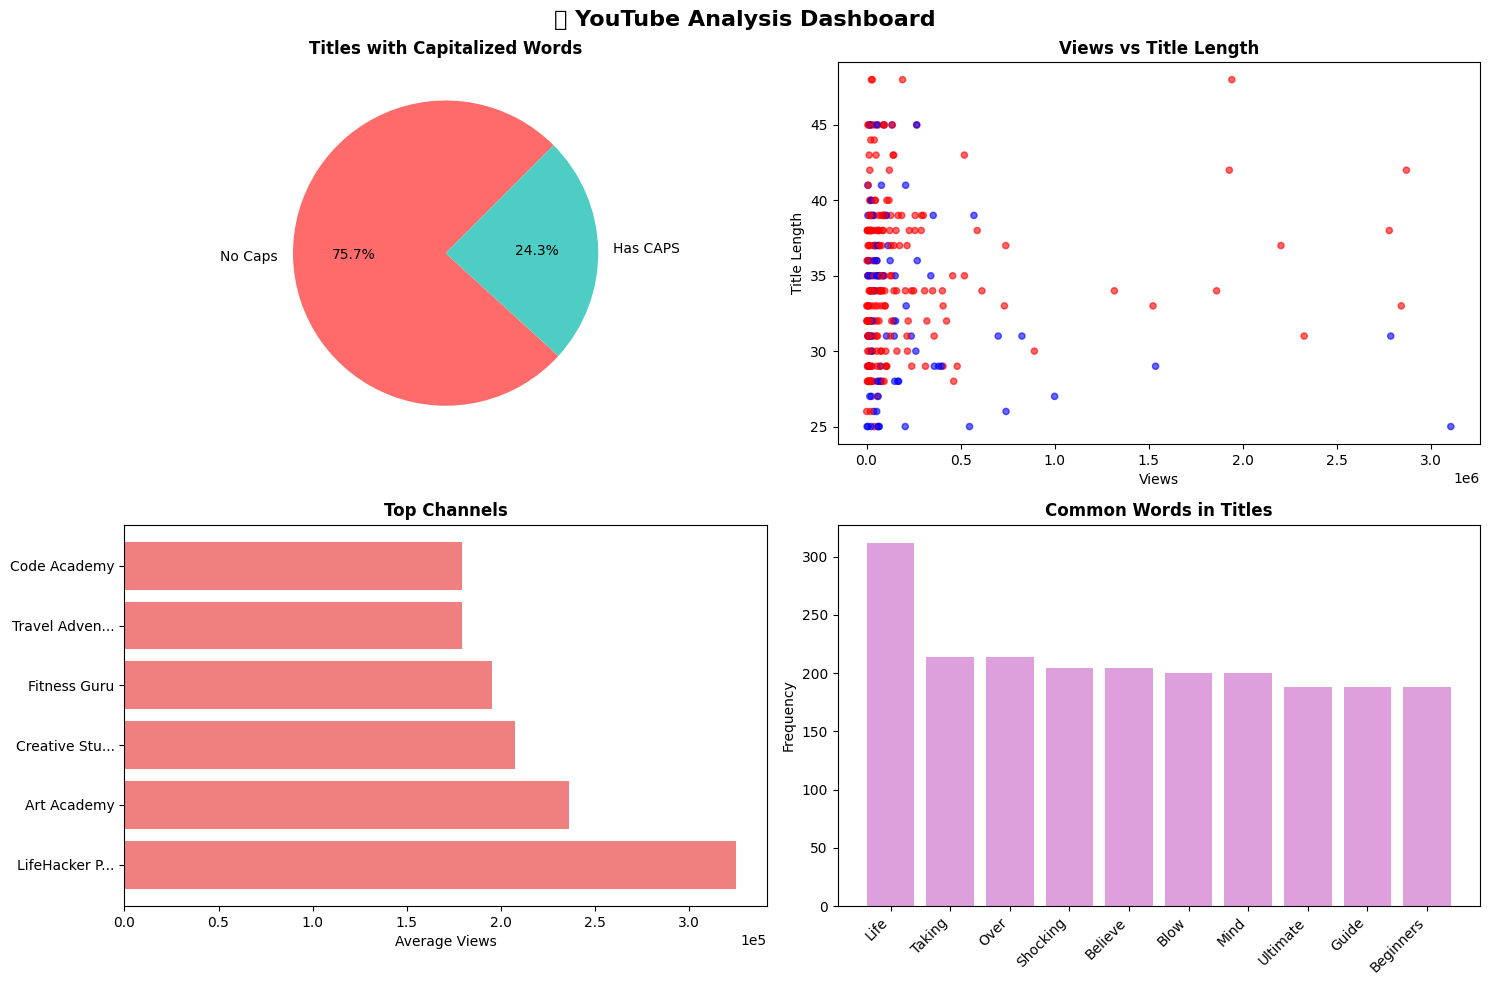


🔍 Key Insights:
   • Most viewed video: 19,367,311 views
   • Top channel: LifeHacker Pro (avg: 324,930 views)
   • Engagement rate: 0.0559

📋 Sample Data:
                                   title           channel  views  likes  has_caps
SHOCKING AI Technology You Won't Believe    LifeHacker Pro 126130   4067      True
       SHOCKING Coding You Won't Believe      Code Academy  48659   1045      True
     HOW TO Photography IN 2024 (WORKS!) Travel Adventures 158186   7473      True
         HOW TO Cooking IN 2024 (WORKS!)       Gaming Zone 588036  21764      True
       SHOCKING Gaming You Won't Believe       Art Academy  42140   2114      True

✅ Analysis complete! Dataset ready for further exploration.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
import random

# Configuration
warnings.filterwarnings('ignore')
np.random.seed(42)
random.seed(42)

def generate_youtube_data(n_rows=1500):
    """Generate clean YouTube dataset"""

    title_templates = [
        "HOW TO {} IN 2024 (WORKS!)",
        "SHOCKING {} You Won't Believe",
        "TOP 10 {} That Will BLOW Your Mind",
        "Why {} Is Taking Over",
        "Ultimate {} Guide for Beginners",
        "24 HOURS of {} Challenge",
        "INSANE {} Transformation",
        "{} That Changed My Life"
    ]

    topics = [
        "AI Technology", "Gaming", "Cooking", "Fitness", "Travel",
        "Music Production", "Art Tutorial", "Business Tips",
        "Photography", "Coding", "Life Hacks", "Investment"
    ]

    channels = [
        "TechReview Central", "LifeHacker Pro", "Creative Studio",
        "Fitness Guru", "Travel Adventures", "Gaming Zone",
        "Business Insights", "Art Academy", "Code Academy"
    ]

    data = []
    for i in range(n_rows):
        # Generate title
        template = random.choice(title_templates)
        topic = random.choice(topics)
        title = template.format(topic)

        # Add caps to some titles
        if random.random() < 0.4:
            words = title.split()
            for j in range(min(2, len(words))):
                idx = random.randint(0, len(words)-1)
                if len(words[idx]) > 3:
                    words[idx] = words[idx].upper()
            title = " ".join(words)

        # Generate realistic metrics
        views = max(1000, int(np.random.lognormal(11, 1.5)))
        likes = max(1, int(views * (0.02 + random.random() * 0.05)))
        comments = max(0, int(likes * random.uniform(0.1, 0.4)))

        data.append({
            'title': title,
            'channel': random.choice(channels),
            'views': views,
            'likes': likes,
            'comments': comments
        })

    return pd.DataFrame(data)

def contains_caps(title):
    """Check if title has capitalized words"""
    words = str(title).split()
    return any(len(word) > 1 and word.isupper() for word in words)

def analyze_youtube():
    """Main analysis function"""

    print("🎬 Generating YouTube Dataset...")
    df = generate_youtube_data(1500)

    # Add analysis columns
    df['title_length'] = df['title'].str.len()
    df['has_caps'] = df['title'].apply(contains_caps)
    df['engagement'] = (df['likes'] + df['comments']) / df['views']

    print(f"✅ Generated {len(df)} videos from {df['channel'].nunique()} channels")
    print(f"📊 Average views: {df['views'].mean():,.0f}")
    print(f"📝 Average title length: {df['title_length'].mean():.1f} chars")
    print(f"🔤 Videos with CAPS: {df['has_caps'].mean()*100:.1f}%")

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('🎥 YouTube Analysis Dashboard', fontsize=16, fontweight='bold')

    # 1. Capitalization Pie Chart
    caps_data = df['has_caps'].value_counts()
    axes[0,0].pie(caps_data.values, labels=['No Caps', 'Has CAPS'],
                  colors=['#ff6b6b', '#4ecdc4'], autopct='%1.1f%%', startangle=45)
    axes[0,0].set_title('Titles with Capitalized Words', fontweight='bold')

    # 2. Views vs Title Length Scatter
    sample = df.sample(300, random_state=42)
    colors = ['red' if x else 'blue' for x in sample['has_caps']]
    axes[0,1].scatter(sample['views'], sample['title_length'], c=colors, alpha=0.6, s=20)
    axes[0,1].set_xlabel('Views')
    axes[0,1].set_ylabel('Title Length')
    axes[0,1].set_title('Views vs Title Length', fontweight='bold')
    axes[0,1].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

    # 3. Top Channels
    channel_avg = df.groupby('channel')['views'].mean().nlargest(6)
    axes[1,0].barh(range(len(channel_avg)), channel_avg.values, color='lightcoral')
    axes[1,0].set_yticks(range(len(channel_avg)))
    axes[1,0].set_yticklabels([name[:12] + '...' if len(name) > 12 else name
                               for name in channel_avg.index])
    axes[1,0].set_xlabel('Average Views')
    axes[1,0].set_title('Top Channels', fontweight='bold')
    axes[1,0].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

    # 4. Word Frequency
    all_words = ' '.join(df['title']).lower()
    import re
    words = re.findall(r'\b[a-z]{4,}\b', all_words)
    stop_words = {'that', 'this', 'with', 'your', 'will', 'make', 'best'}
    filtered = [w for w in words if w not in stop_words]

    word_freq = Counter(filtered).most_common(10)
    words, counts = zip(*word_freq)

    axes[1,1].bar(range(len(words)), counts, color='plum')
    axes[1,1].set_xticks(range(len(words)))
    axes[1,1].set_xticklabels([w.capitalize() for w in words], rotation=45, ha='right')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].set_title('Common Words in Titles', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Summary insights
    print(f"\n🔍 Key Insights:")
    print(f"   • Most viewed video: {df['views'].max():,} views")
    print(f"   • Top channel: {channel_avg.index[0]} (avg: {channel_avg.iloc[0]:,.0f} views)")
    print(f"   • Engagement rate: {df['engagement'].mean():.4f}")

    # Sample data
    print(f"\n📋 Sample Data:")
    sample_cols = ['title', 'channel', 'views', 'likes', 'has_caps']
    print(df[sample_cols].head(5).to_string(index=False))

    return df

# Run analysis
if __name__ == "__main__":
    df_result = analyze_youtube()
    print(f"\n✅ Analysis complete! Dataset ready for further exploration.")
